Code Ref: https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data

In [2]:
data = pd.read_csv("playlist_variance_data.csv")
data

,playlist_name,user,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Ady's Playlist,Adityavikram,0.010372,0.017039,11.241046,4.053218,0.253521,0.004150,1.771981e-03,0.015966,0.041227,596.145964,1.678615e+09,0.028571
1,country,Cameron Tomko,0.007319,0.017789,10.587778,2.389484,0.074343,0.000585,1.513854e-05,0.010237,0.035325,1093.978017,7.551312e+08,0.038788
2,Huge music playlist,Cameron Tomko,0.009426,0.011536,13.888788,3.548821,0.244343,0.016779,2.659049e-09,0.018070,0.041053,889.521741,1.845343e+09,0.010000
3,Old music,Cameron Tomko,0.021426,0.017158,15.477092,3.329617,0.242169,0.014515,3.627554e-03,0.019340,0.045469,913.386006,2.669753e+09,0.043478
4,chill,Cameron Tomko,0.016599,0.013714,13.884747,3.486563,0.251616,0.014880,1.645478e-08,0.011504,0.034133,867.332979,2.014392e+09,0.030202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Rock / Rock and Roll,Ryan Dieselman,0.014636,0.026128,13.019293,9.001927,0.149091,0.002042,1.230734e-02,0.028997,0.047830,707.140996,6.494027e+09,0.010000
131,This Is Metallica,Tess,0.020919,0.023727,10.938776,9.114777,0.254694,0.005080,6.166439e-02,0.021483,0.031585,864.599307,1.043761e+10,0.075102
132,I should have been cast in step up,Tess,0.020307,0.014000,10.096866,3.531861,0.256410,0.014802,5.870426e-05,0.016046,0.035479,1341.950710,8.130932e+08,0.037037
133,sad bitch,Tess,0.015632,0.015489,12.765873,3.993475,0.126984,0.012336,1.956988e-05,0.003722,0.025059,1254.169228,7.129790e+09,0.099206


#### Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playlist_name     135 non-null    object 
 1   user              135 non-null    object 
 2   danceability      135 non-null    float64
 3   energy            135 non-null    float64
 4   key               135 non-null    float64
 5   loudness          135 non-null    float64
 6   mode              135 non-null    float64
 7   speechiness       135 non-null    float64
 8   instrumentalness  135 non-null    float64
 9   liveness          135 non-null    float64
 10  valence           135 non-null    float64
 11  tempo             135 non-null    float64
 12  duration_ms       135 non-null    float64
 13  time_signature    135 non-null    float64
dtypes: float64(12), object(2)
memory usage: 14.9+ KB


In [4]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,1.350000e+02,135.000000
mean,0.015161,0.024257,12.980093,6.758665,0.213876,0.005965,0.024098,0.019834,0.041465,772.970897,3.109455e+09,0.091607
std,0.005539,0.021212,1.626953,5.296320,0.062946,0.006883,0.034438,0.013141,0.012759,297.694197,5.552433e+09,0.106566
min,0.004232,0.000868,9.859697,1.494476,0.029394,0.000024,0.000000,0.000362,0.004433,5.595369,2.779189e+08,0.000000
25%,0.010928,0.015374,11.792447,3.454169,0.194066,0.001617,0.000917,0.011740,0.034270,601.150452,1.283459e+09,0.024387
50%,0.014578,0.021991,12.982222,5.518720,0.239474,0.004375,0.007141,0.017018,0.040298,787.535592,1.886679e+09,0.052632
75%,0.018477,0.029228,13.671814,8.848025,0.251098,0.009006,0.032975,0.024871,0.048376,972.902719,3.328476e+09,0.113106
max,0.033584,0.237360,20.000000,39.955300,0.500000,0.060517,0.143293,0.100994,0.097240,1537.408495,6.187464e+10,0.654949


In [5]:
# sns.pairplot(data)

In [6]:
# sns.heatmap(data.corr(), cmap="BuPu")

#### Preprocessing the data

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:,2:])

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
data_normalized = normalize(data_scaled)

# Converting the numpy array into a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=data.columns[2:])

data_scaled = pd.DataFrame(data_scaled, columns=data.columns[2:])
data_scaled

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.867680,-0.341532,-1.072879,-0.512719,0.632179,-0.264633,-0.650695,-0.295427,-0.018700,-0.596194,-0.258656,-0.593718
1,-1.421092,-0.306059,-1.475904,-0.828019,-2.224949,-0.784401,-0.701899,-0.733012,-0.483013,1.082328,-0.425596,-0.497490
2,-1.039121,-0.601903,0.560606,-0.608309,0.485834,1.576954,-0.702340,-0.134731,-0.032354,0.392970,-0.228516,-0.768639
3,1.135313,-0.335896,1.540487,-0.649851,0.451164,1.246890,-0.596613,-0.037730,0.315029,0.473432,-0.079486,-0.453312
4,0.260731,-0.498879,0.558113,-0.620108,0.601803,1.300006,-0.702340,-0.636255,-0.576725,0.318157,-0.197957,-0.578359
...,...,...,...,...,...,...,...,...,...,...,...,...
130,-0.094983,0.088571,0.024184,0.425129,-1.033042,-0.572061,-0.343636,0.699864,0.500726,-0.221956,0.611836,-0.768639
131,1.043444,-0.025071,-1.259361,0.446515,0.650879,-0.129007,1.094900,0.125991,-0.777229,0.308940,1.324725,-0.155453
132,0.932574,-0.485313,-1.778764,-0.611523,0.678248,1.288654,-0.700629,-0.289302,-0.470883,1.918408,-0.415118,-0.513981
133,0.085505,-0.414868,-0.132160,-0.524041,-1.385552,0.929064,-0.701770,-1.230637,-1.290556,1.622438,0.726764,0.071581


#### Reduce dimensionality of data to 3D

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
data_principal_3 = pca.fit_transform(data_scaled)
data_principal_3 = pd.DataFrame(data_principal_3)
data_principal_3.columns = ['P1', 'P2', 'P3']
data_principal_3.head()

,P1,P2,P3
0,0.163728,-1.126572,0.689054
1,-1.760211,-2.211138,-0.590846
2,1.266574,-1.103852,-0.595862
3,1.329153,-0.126425,-1.220307
4,0.708815,-0.833975,-0.852794


#### Determine optimal epsilon value by computing kNN distances

NearestNeighbors function requires n_neighbors (number of neighbors) parameter, which can be same as the minPts value.

Ref: https://www.reneshbedre.com/blog/dbscan-python.html

In [9]:
from sklearn.neighbors import NearestNeighbors

In [10]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(data_principal_3)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(data_principal_3)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

In [11]:
import matplotlib.pyplot as plt

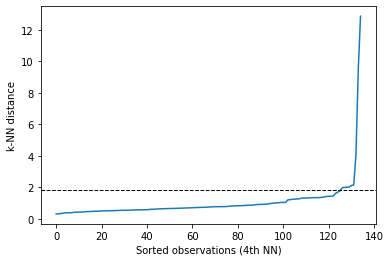

In [12]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=1.8, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

#### Build and implement DBSCAN model

In [13]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=7, metric='euclidean').fit(data_principal_3)

In [14]:
from collections import Counter
labels = model.labels_
print(labels)
Counter(labels)

[ 1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1  2 -1  1 -1  1 -1 -1 -1  0 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1  1 -1 -1  2 -1 -1 -1  2 -1 -1  0  1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1
  2  1  1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
  0 -1 -1 -1 -1 -1 -1  1 -1 -1  2 -1 -1 -1 -1]


Counter({1: 8, -1: 110, 2: 7, 0: 10})

#### Visualize clusters

In [15]:
# # Building the label to colour mapping
# colours = {}
# colours[-1] = 'firebrick'
# colours[0] = 'darkorange'
# colours[1] = 'gold'
# colours[2] = 'lightseagreen'
# colours[3] = 'royalblue'
# colours[4] = 'm'

# # Building the colour vector for each data point
# cvec = [colours[label] for label in labels]

# color_list = ['firebrick', 'darkorange', 'gold', 'lightseagreen', 'royalblue', 'm']

# print(colours)

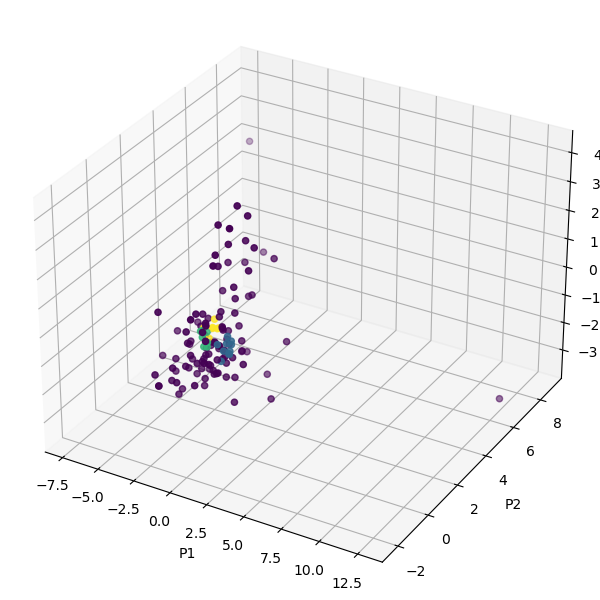

In [16]:
# to interact  with plot
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

x = data_principal_3['P1']
y = data_principal_3['P2']
z = data_principal_3['P3']

sc = ax.scatter(x, y, z, s=20, marker="o", c=labels)
ax.set_xlabel("P1")
ax.set_ylabel("P2")
ax.set_zlabel("P3")


# legend
# plt.legend(loc='lower right')

plt.show()

#### Re-do DBSCAN with 2 PC's

In [17]:
pca2 = PCA(n_components = 2)
data_principal_2 = pca2.fit_transform(data_scaled)
data_principal_2 = pd.DataFrame(data_principal_2)
data_principal_2.columns = ['P1', 'P2']
data_principal_2.head()

,P1,P2
0,0.163728,-1.126572
1,-1.760211,-2.211138
2,1.266574,-1.103852
3,1.329153,-0.126425
4,0.708815,-0.833975


In [18]:
model2 = DBSCAN(eps=0.5, min_samples=5, metric='euclidean').fit(data_principal_2)

In [19]:
labels2 = model2.labels_
print(labels2)
Counter(labels2)

[ 0 -1  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0 -1  0  0  0 -1
  0  0  0  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1  0  0  0  0  0 -1  0 -1 -1
  0 -1  0  0 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0
  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0
 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0 -1 -1  0
  0  0  0  0  0 -1  0  0  0  0  0 -1  0 -1 -1]


Counter({0: 97, -1: 38})

In [20]:
df2d = pd.DataFrame(data_principal_2)
df2d.columns = ['P1', 'P2']
df2d["Labels"] = labels2
df2d

,P1,P2,Labels
0,0.163728,-1.126572,0
1,-1.760211,-2.211138,-1
2,1.266574,-1.103852,0
3,1.329153,-0.126425,0
4,0.708815,-0.833975,0
...,...,...,...
130,-0.072448,0.093794,0
131,-0.982543,1.263856,-1
132,-0.295507,-0.543506,0
133,-1.505091,-0.829107,-1


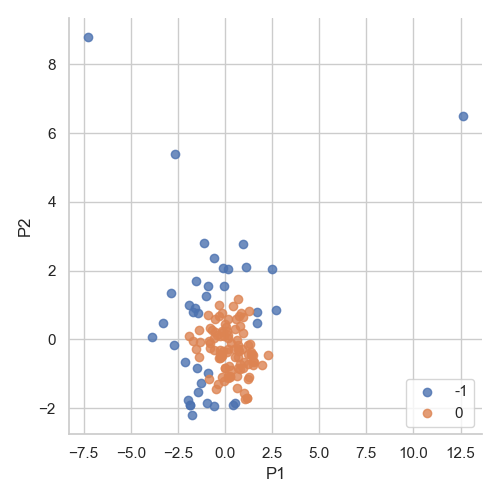

In [21]:
sns.set(style='whitegrid')

sns.lmplot( x="P1", y="P2", data=df2d, fit_reg=False, hue='Labels', legend=False)
plt.legend(loc='lower right')

plt.show()

#### DBSCAN with 10 features

In [22]:
pca10 = PCA(n_components = 10)
data_principal_10 = pca10.fit_transform(data_scaled)
data_principal_10 = pd.DataFrame(data_principal_10)
data_principal_10.columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9','P10']
data_principal_10.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,0.163728,-1.126572,0.689054,-0.042773,0.218655,0.052528,-0.979436,1.008819,0.031815,0.155223
1,-1.760211,-2.211138,-0.590846,-0.931213,1.587495,-0.818447,-0.380548,0.293531,-0.681194,-0.436405
2,1.266574,-1.103852,-0.595862,1.130784,0.008360,-0.038810,-0.467397,0.074427,-0.822490,-0.038195
3,1.329153,-0.126425,-1.220307,0.502661,-1.422375,0.542603,0.585771,-0.248894,-0.642345,-0.167587
4,0.708815,-0.833975,-0.852794,0.953250,-0.950269,0.300345,-0.430669,0.111956,-0.506741,0.339352


In [23]:
model10 = DBSCAN(eps=0.3, min_samples=4, metric='euclidean').fit(data_principal_2)

In [24]:
labels10 = model10.labels_
print(labels10)
Counter(labels10)

[ 0 -1 -1  1  1 -1  1  1  1  1 -1 -1 -1  1  1  0 -1  0  2 -1  3  1 -1 -1
 -1  0  1  3 -1  1 -1 -1 -1 -1 -1  4  1  1 -1  1  1  2  1 -1 -1  1 -1 -1
 -1  4  0  1 -1  1  1 -1 -1  1 -1  1  1  0  4  0  1 -1 -1 -1  1 -1  1  1
  1  1  0  1 -1  1 -1  1  1 -1 -1  1  1  1 -1  2  2 -1 -1  0 -1  2  0  1
 -1 -1 -1 -1 -1  1  3  1  1 -1  1  2  2  1 -1  1  1 -1 -1  1  1 -1 -1  1
  1 -1  1  3  1 -1  1  0 -1  1  1 -1  1 -1  4]


Counter({0: 11, -1: 55, 1: 54, 2: 7, 3: 4, 4: 4})

#### DBSCAN with all features

In [25]:
model_all = DBSCAN(eps=1.56, min_samples=3, metric='euclidean').fit(data_scaled)

In [26]:
labels_all = model_all.labels_
print(labels_all)
Counter(labels_all)

[ 0  1  0  0  0 -1  0  0  2  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0  0 -1  0
 -1  0  0  0 -1 -1 -1 -1 -1 -1  1 -1 -1  0 -1  0  0 -1  0 -1 -1  0 -1 -1
 -1 -1  0  0 -1 -1  0 -1 -1 -1 -1 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0
 -1  0  0  0 -1 -1 -1  0  0 -1 -1  0  0  0 -1  2  2 -1 -1  0 -1 -1 -1  0
 -1  1 -1  1 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
  0 -1 -1  0 -1 -1 -1  0 -1  2 -1 -1 -1 -1 -1]


Counter({0: 42, 1: 4, -1: 85, 2: 4})

#### Summary of all results

In [27]:
pc_summary = data.iloc[:,0:2]
pc_summary["Labels_2PCs"] = labels2
pc_summary["Labels_3PCs"] = labels
pc_summary["Labels_10PCs"] = labels10
pc_summary["Labels_all"] = labels_all

In [28]:
pc_summary = pc_summary.sort_values(by=["Labels_3PCs"], ascending=True)
pc_summary

,playlist_name,user,Labels_2PCs,Labels_3PCs,Labels_10PCs,Labels_all
67,Peaceful Piano,Public 19,-1,-1,-1,-1
95,The New Alt,Public 4,0,-1,1,0
94,New Noise,Public 4,0,-1,0,-1
93,All New Indie,Public 4,0,-1,2,-1
92,Ultimate Indie,Public 4,-1,-1,-1,-1
...,...,...,...,...,...,...
53,Feelin' Good,Public 16,0,2,1,-1
130,Rock / Rock and Roll,Ryan Dieselman,0,2,1,-1
68,Funk & Soul Classics,Public 19,0,2,1,-1
57,The Pulse of Americana,Public 17,0,2,1,-1


In [29]:
# save to csv
# pc_summary.to_csv("DBSCAN_results_eps0.5_minsamp5.csv", index=False)